In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv('magic04.data', names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
#inserting 0 or 1 in class columns
df["class"]=(df["class"]=="g").astype(int)

In [4]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

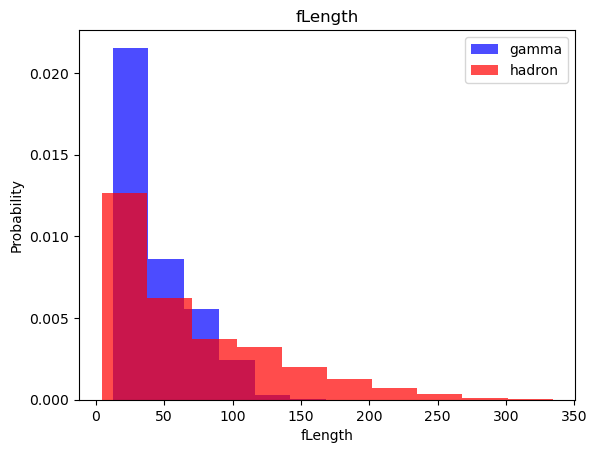

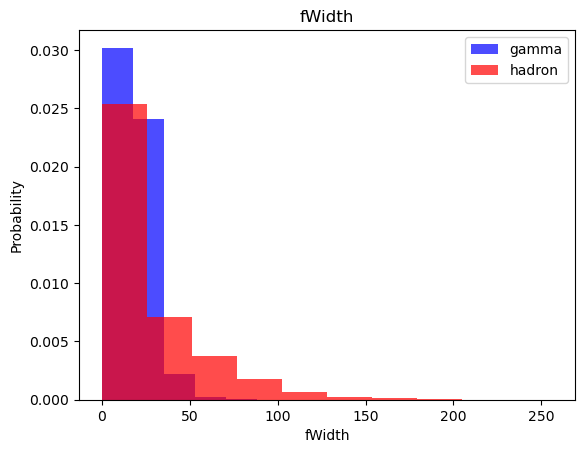

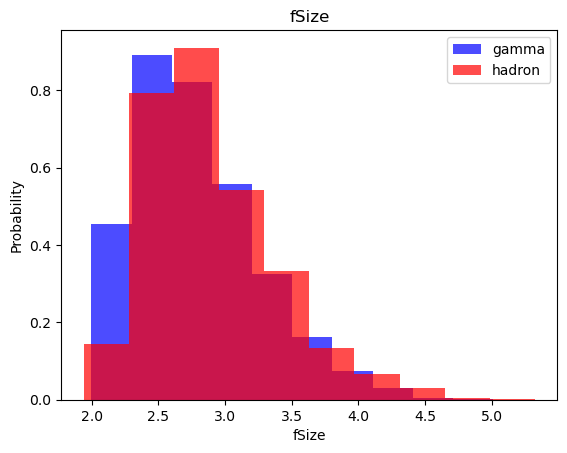

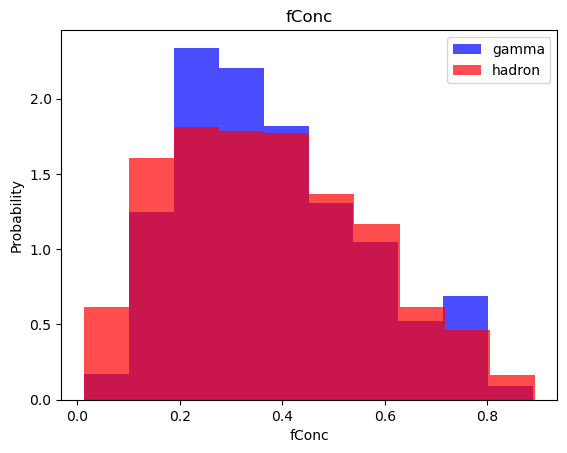

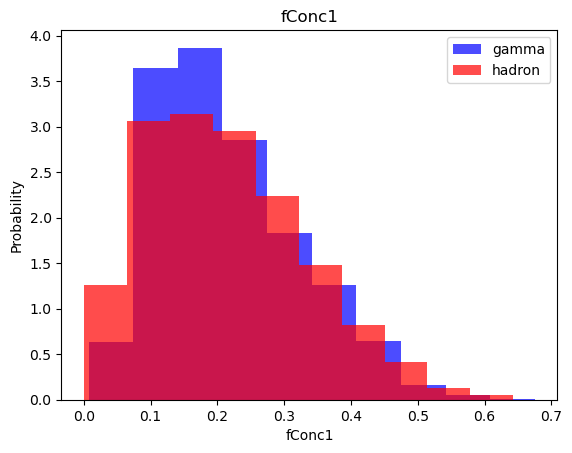

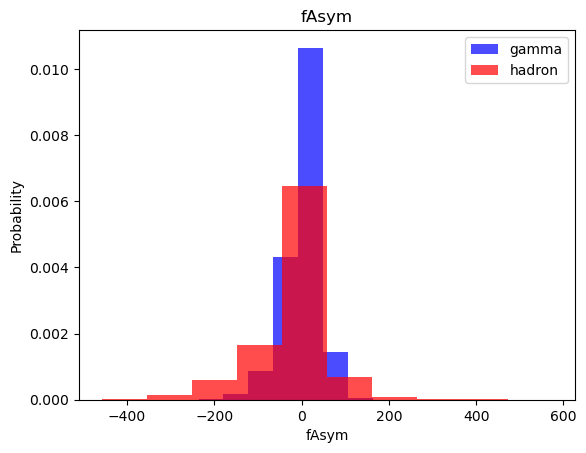

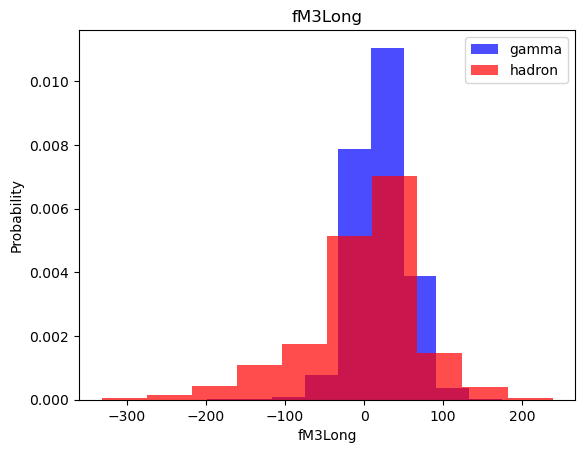

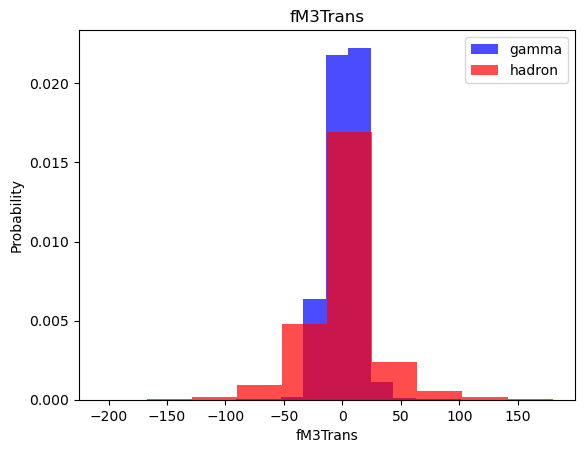

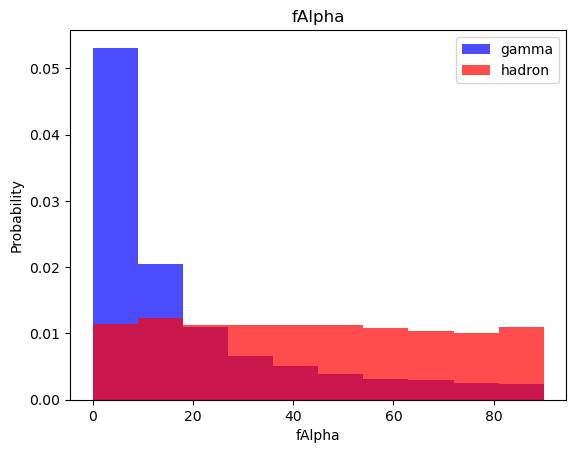

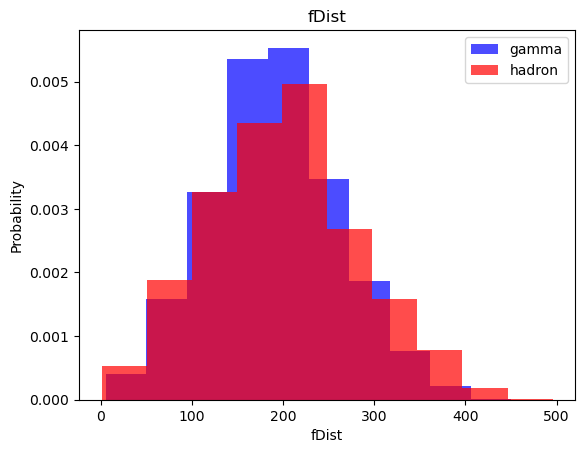

In [5]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density= True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density= True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# train,validation, test datasets

In [6]:
train,valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [7]:
def scale_dataset(dataframe, oversample=False):
    if isinstance(dataframe, pd.DataFrame):
        X = dataframe[dataframe.columns[:-1]].values
        y = dataframe[dataframe.columns[-1]].values
    elif isinstance(dataframe, np.ndarray):
        X = dataframe[:, :-1]
        y = dataframe[:, -1]
    else:
        raise ValueError("Input 'dataframe' must be either a pandas DataFrame or a NumPy array.")
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    if isinstance(dataframe, pd.DataFrame):
        data = np.column_stack((X, y))
    else:
        data = np.column_stack((X, y))
    
    return data, X, y

In [8]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

## k neighbours

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit (X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred = knn_model.predict(X_test)

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1362
           1       0.86      0.86      0.86      2442

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



## naive bayes


In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [15]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1362
           1       0.73      0.90      0.81      2442

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



## log regression


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [18]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1362
           1       0.83      0.82      0.83      2442

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



## SVM

In [19]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [21]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1362
           1       0.89      0.89      0.89      2442

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



## neural net

In [22]:
import tensorflow as tf

In [30]:
def plot_history(history):
    fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    

    plt.show()

In [37]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split = 0.2, verbose = 0
    )
    
    return nn_model, history

16 nodes, dropout 0, lr0.01, batch size 32


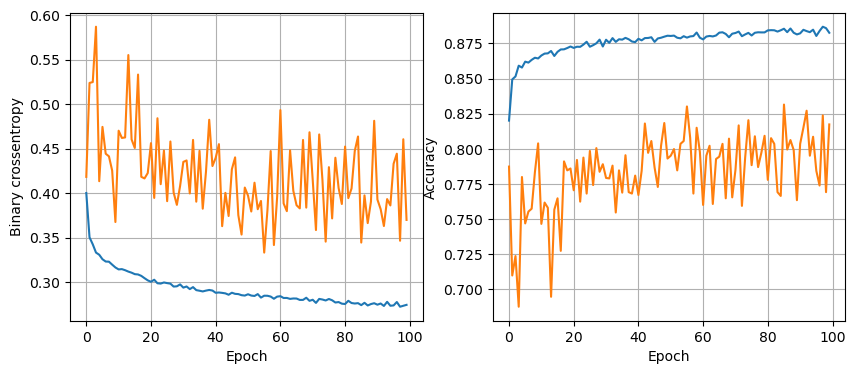

119/119 [==============================] - 0s 811us/step - loss: 0.3008 - accuracy: 0.8696
16 nodes, dropout 0, lr0.01, batch size 64


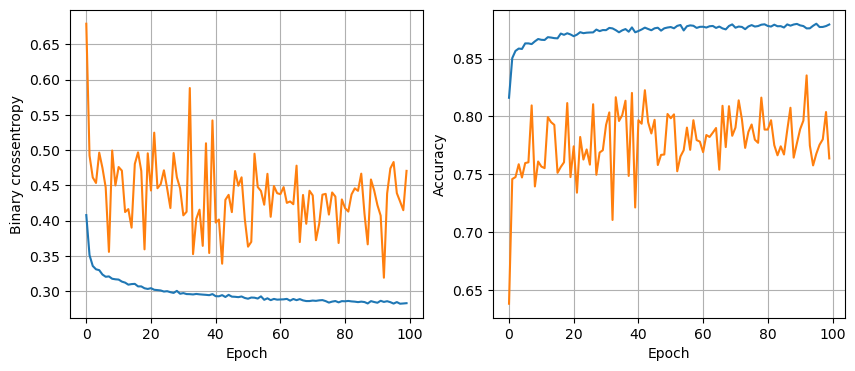

119/119 [==============================] - 0s 820us/step - loss: 0.3185 - accuracy: 0.8670
16 nodes, dropout 0, lr0.01, batch size 128


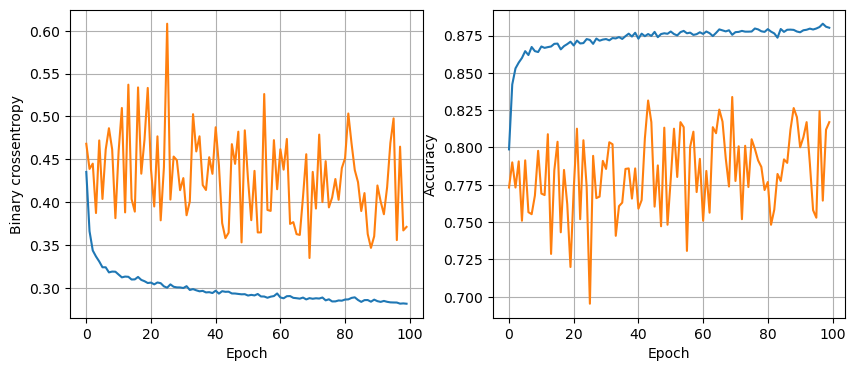

119/119 [==============================] - 0s 820us/step - loss: 0.3160 - accuracy: 0.8651
16 nodes, dropout 0, lr0.005, batch size 32


119/119 [==============================] - 0s 814us/step - loss: 0.3180 - accuracy: 0.8683
16 nodes, dropout 0, lr0.005, batch size 64


119/119 [==============================] - 0s 798us/step - loss: 0.3023 - accuracy: 0.8730
16 nodes, dropout 0, lr0.005, batch size 128


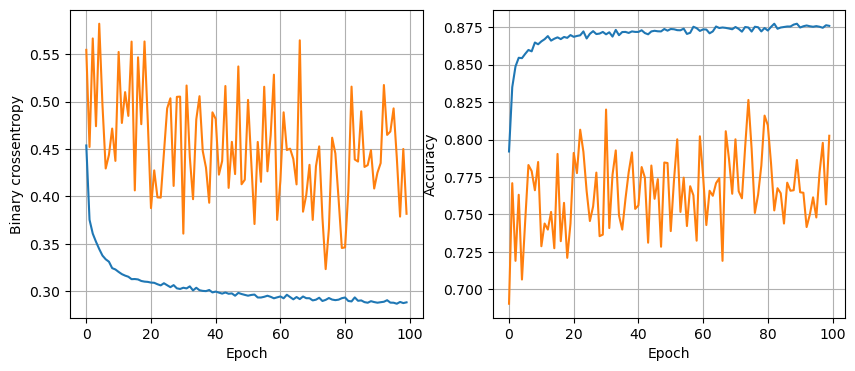

119/119 [==============================] - 0s 793us/step - loss: 0.3094 - accuracy: 0.8722
16 nodes, dropout 0, lr0.001, batch size 32


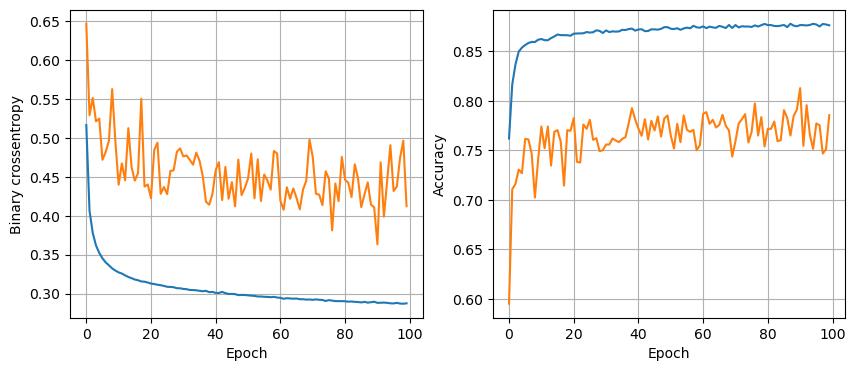

119/119 [==============================] - 0s 786us/step - loss: 0.3049 - accuracy: 0.8707
16 nodes, dropout 0, lr0.001, batch size 64


119/119 [==============================] - 0s 853us/step - loss: 0.3062 - accuracy: 0.8678
16 nodes, dropout 0, lr0.001, batch size 128


119/119 [==============================] - 0s 1ms/step - loss: 0.3103 - accuracy: 0.8699
16 nodes, dropout 0.2, lr0.01, batch size 32


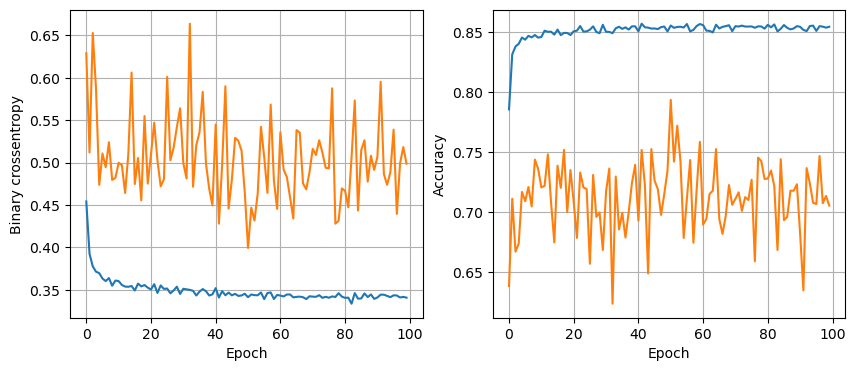

119/119 [==============================] - 0s 761us/step - loss: 0.3156 - accuracy: 0.8638
16 nodes, dropout 0.2, lr0.01, batch size 64


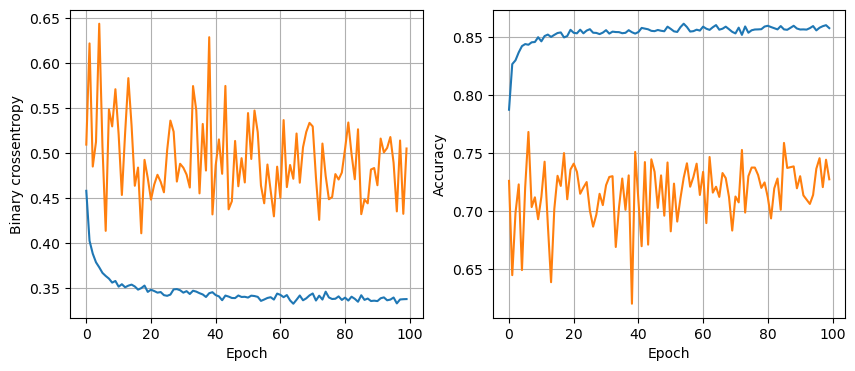

119/119 [==============================] - 0s 760us/step - loss: 0.3117 - accuracy: 0.8686
16 nodes, dropout 0.2, lr0.01, batch size 128


119/119 [==============================] - 0s 736us/step - loss: 0.3110 - accuracy: 0.8683
16 nodes, dropout 0.2, lr0.005, batch size 32


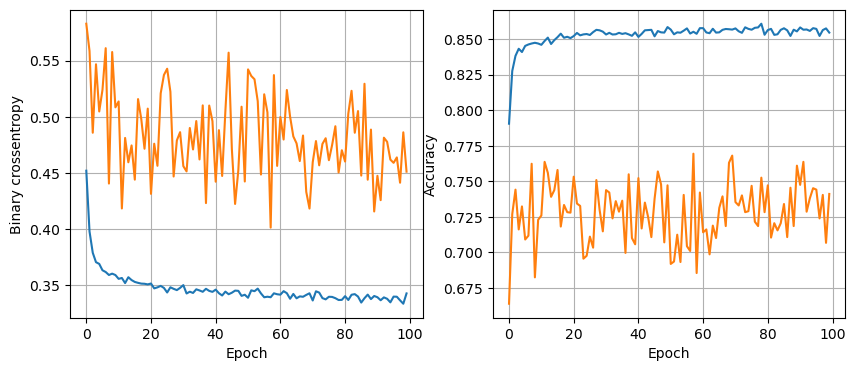

119/119 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8633
16 nodes, dropout 0.2, lr0.005, batch size 64


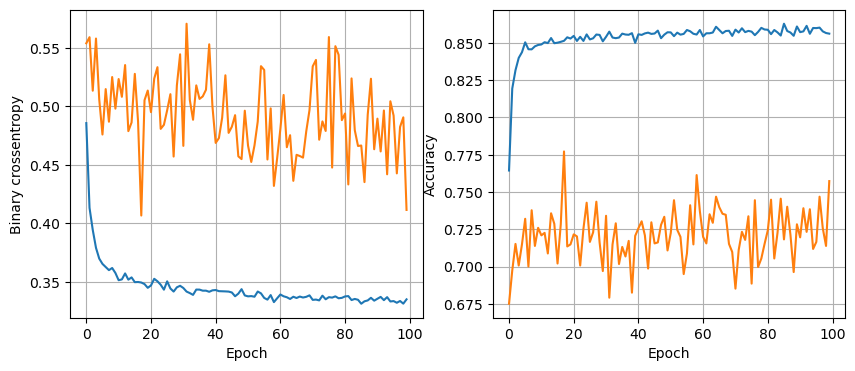

119/119 [==============================] - 0s 900us/step - loss: 0.3089 - accuracy: 0.8672
16 nodes, dropout 0.2, lr0.005, batch size 128


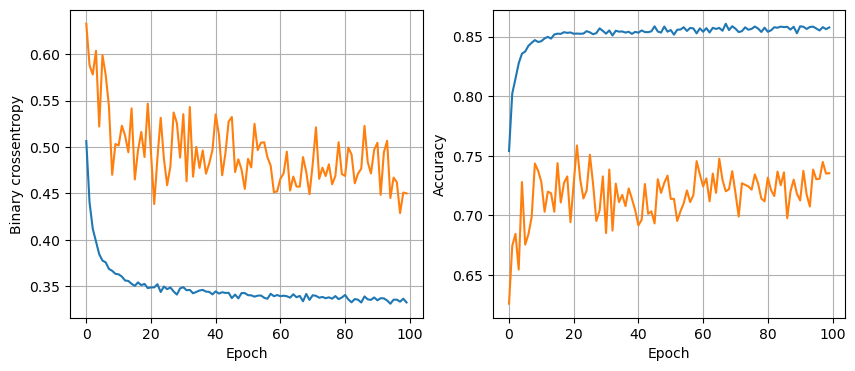

119/119 [==============================] - 0s 909us/step - loss: 0.3150 - accuracy: 0.8709
16 nodes, dropout 0.2, lr0.001, batch size 32


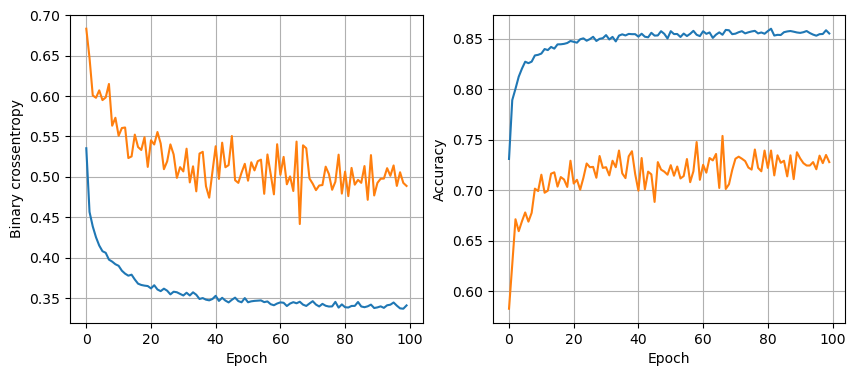

119/119 [==============================] - 0s 824us/step - loss: 0.3171 - accuracy: 0.8662
16 nodes, dropout 0.2, lr0.001, batch size 64


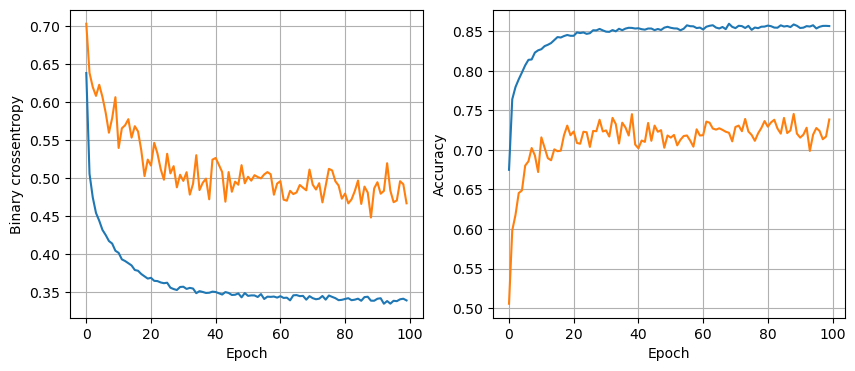

119/119 [==============================] - 0s 836us/step - loss: 0.3194 - accuracy: 0.8657
16 nodes, dropout 0.2, lr0.001, batch size 128


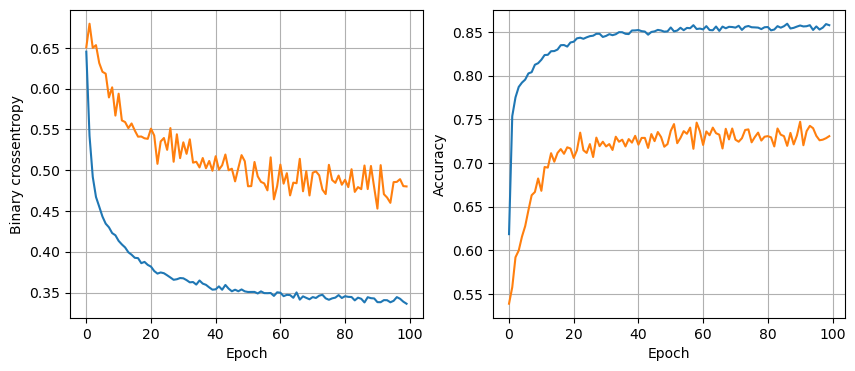

119/119 [==============================] - 0s 820us/step - loss: 0.3155 - accuracy: 0.8646
32 nodes, dropout 0, lr0.01, batch size 32


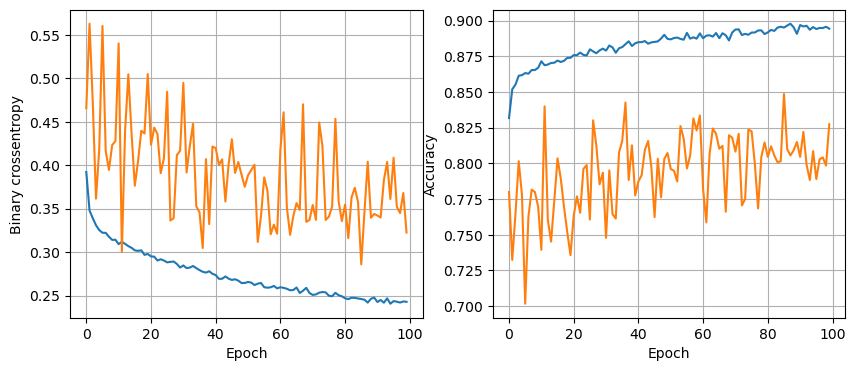

119/119 [==============================] - 0s 811us/step - loss: 0.3851 - accuracy: 0.8636
32 nodes, dropout 0, lr0.01, batch size 64


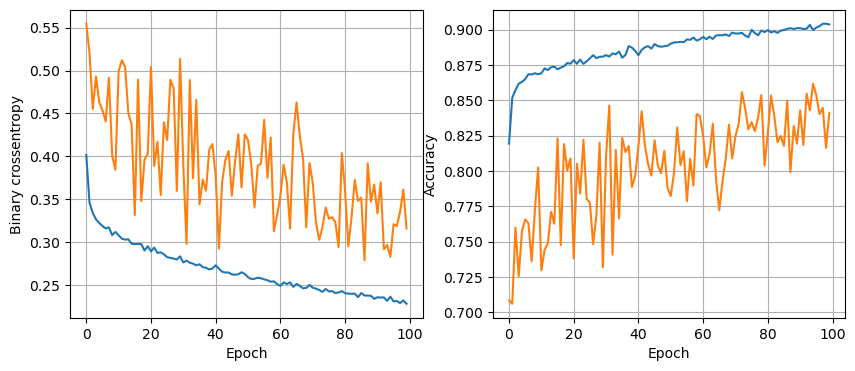

119/119 [==============================] - 0s 827us/step - loss: 0.3648 - accuracy: 0.8628
32 nodes, dropout 0, lr0.01, batch size 128


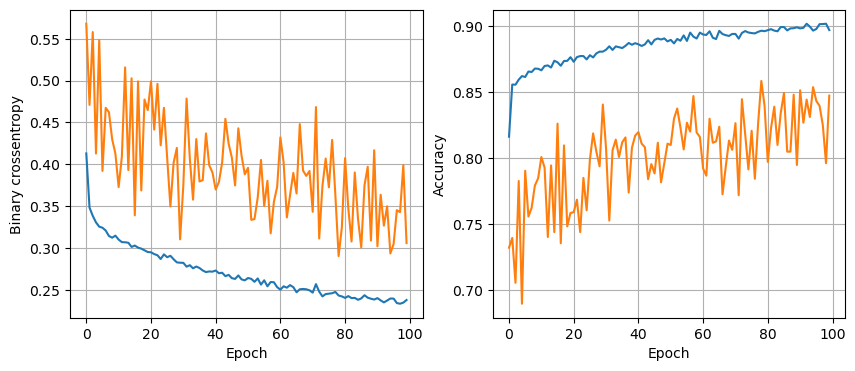

119/119 [==============================] - 0s 845us/step - loss: 0.3219 - accuracy: 0.8691
32 nodes, dropout 0, lr0.005, batch size 32


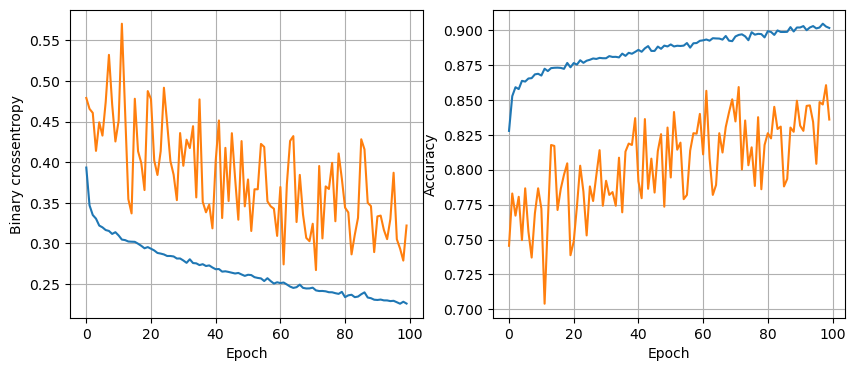

119/119 [==============================] - 0s 828us/step - loss: 0.3630 - accuracy: 0.8659
32 nodes, dropout 0, lr0.005, batch size 64


119/119 [==============================] - 0s 828us/step - loss: 0.3337 - accuracy: 0.8680
32 nodes, dropout 0, lr0.005, batch size 128


119/119 [==============================] - 0s 829us/step - loss: 0.3246 - accuracy: 0.8696
32 nodes, dropout 0, lr0.001, batch size 32


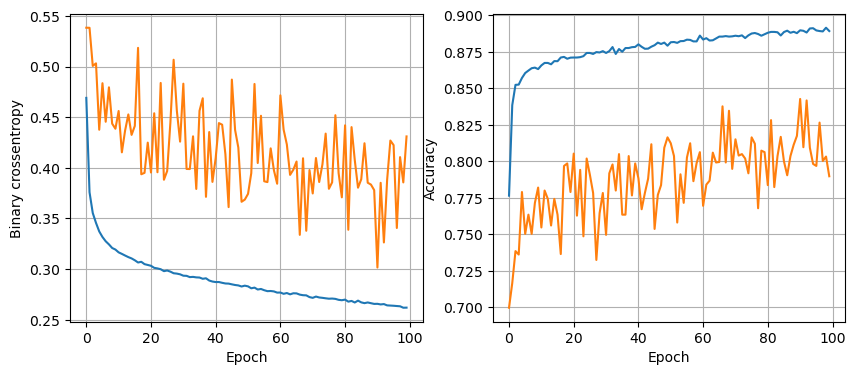

119/119 [==============================] - 0s 952us/step - loss: 0.3059 - accuracy: 0.8693
32 nodes, dropout 0, lr0.001, batch size 64


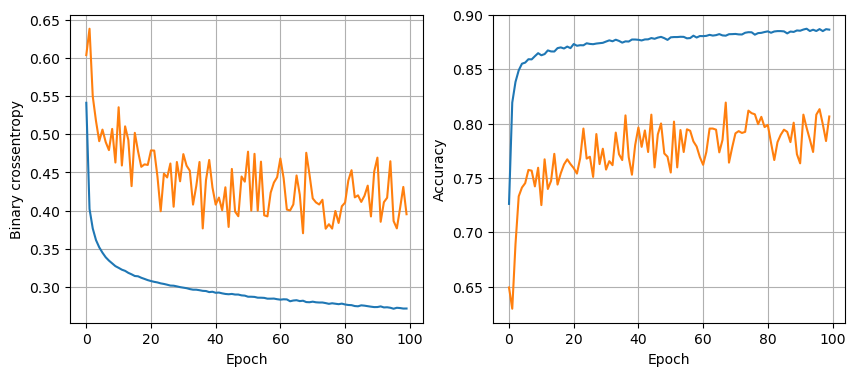

119/119 [==============================] - 0s 817us/step - loss: 0.3111 - accuracy: 0.8672
32 nodes, dropout 0, lr0.001, batch size 128


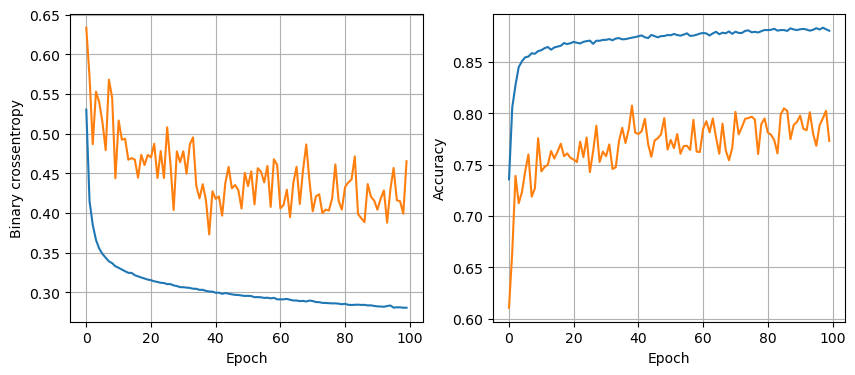

119/119 [==============================] - 0s 884us/step - loss: 0.3056 - accuracy: 0.8688
32 nodes, dropout 0.2, lr0.01, batch size 32


119/119 [==============================] - 0s 1ms/step - loss: 0.3102 - accuracy: 0.8662
32 nodes, dropout 0.2, lr0.01, batch size 64


119/119 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8704
32 nodes, dropout 0.2, lr0.01, batch size 128


119/119 [==============================] - 0s 910us/step - loss: 0.2977 - accuracy: 0.8717
32 nodes, dropout 0.2, lr0.005, batch size 32


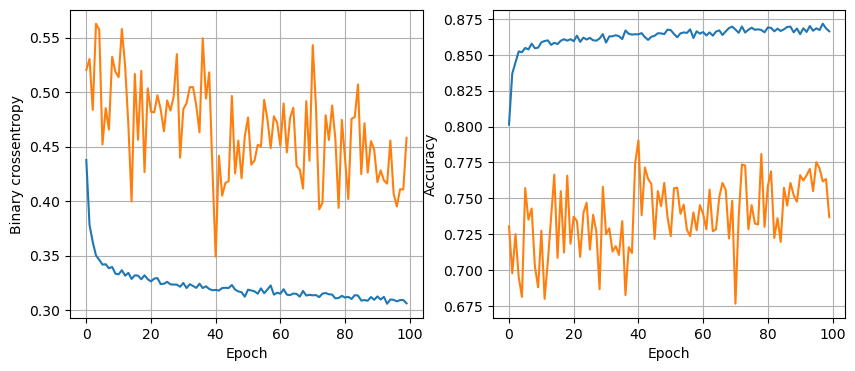

119/119 [==============================] - 0s 938us/step - loss: 0.3018 - accuracy: 0.8699
32 nodes, dropout 0.2, lr0.005, batch size 64


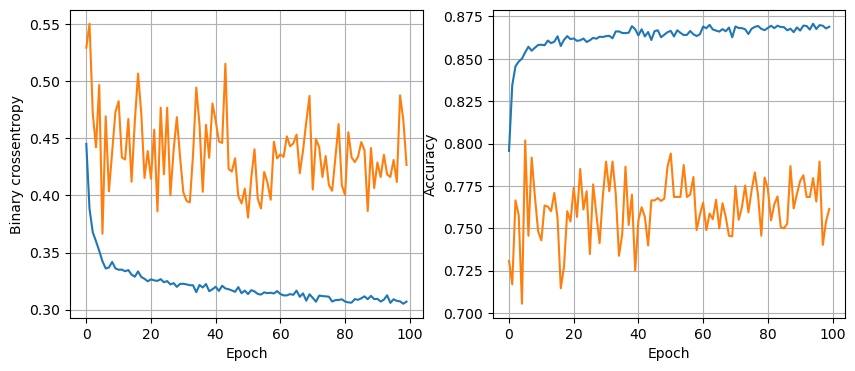

119/119 [==============================] - 0s 904us/step - loss: 0.3028 - accuracy: 0.8715
32 nodes, dropout 0.2, lr0.005, batch size 128


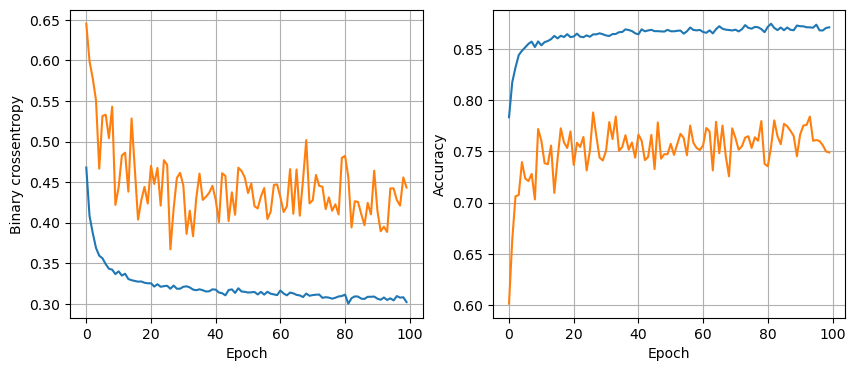

119/119 [==============================] - 0s 830us/step - loss: 0.2973 - accuracy: 0.8733
32 nodes, dropout 0.2, lr0.001, batch size 32


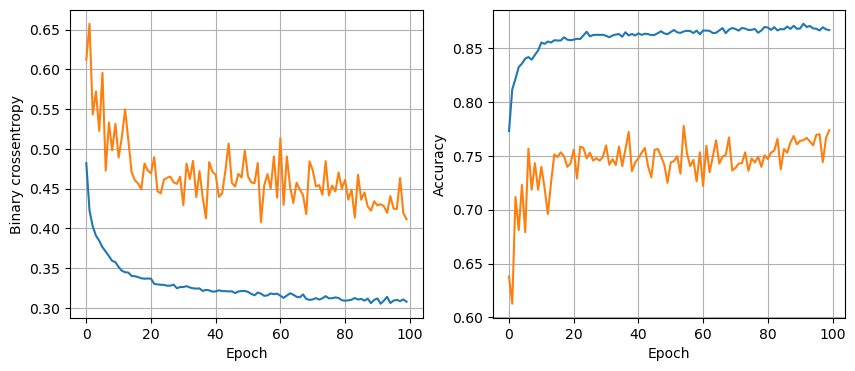

119/119 [==============================] - 0s 863us/step - loss: 0.3005 - accuracy: 0.8743
32 nodes, dropout 0.2, lr0.001, batch size 64


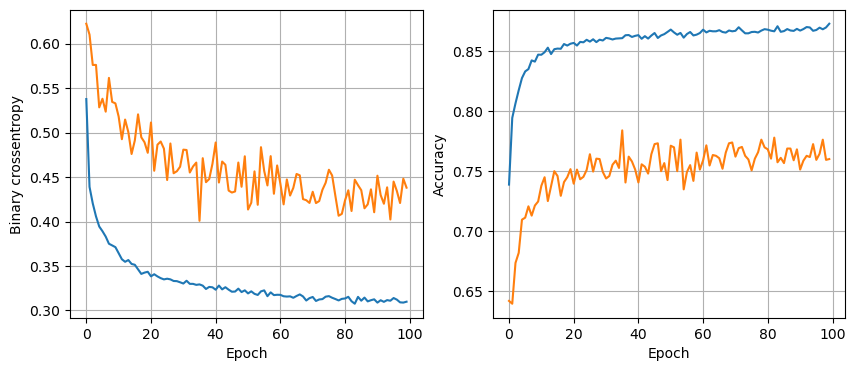

119/119 [==============================] - 0s 1ms/step - loss: 0.2996 - accuracy: 0.8722
32 nodes, dropout 0.2, lr0.001, batch size 128


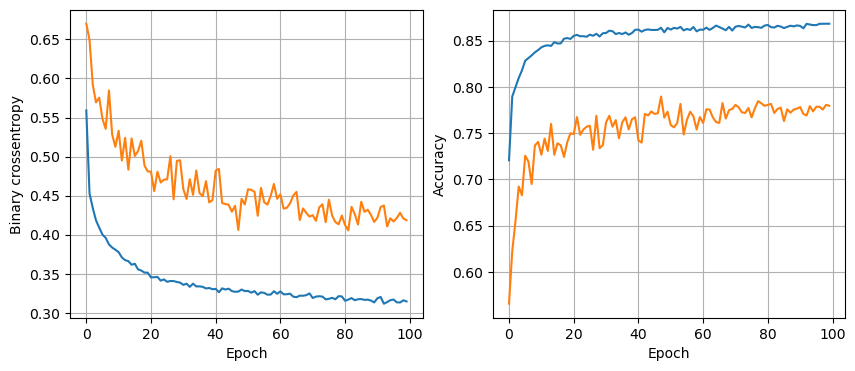

119/119 [==============================] - 0s 1ms/step - loss: 0.3067 - accuracy: 0.8696
64 nodes, dropout 0, lr0.01, batch size 32


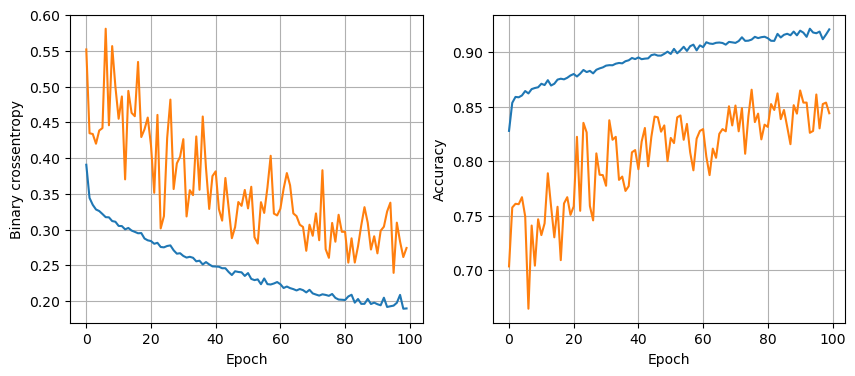

119/119 [==============================] - 0s 1ms/step - loss: 0.4618 - accuracy: 0.8567
64 nodes, dropout 0, lr0.01, batch size 64


119/119 [==============================] - 0s 1ms/step - loss: 0.4987 - accuracy: 0.8644
64 nodes, dropout 0, lr0.01, batch size 128


119/119 [==============================] - 0s 1ms/step - loss: 0.5574 - accuracy: 0.8567
64 nodes, dropout 0, lr0.005, batch size 32


119/119 [==============================] - 0s 1ms/step - loss: 0.5965 - accuracy: 0.8494
64 nodes, dropout 0, lr0.005, batch size 64


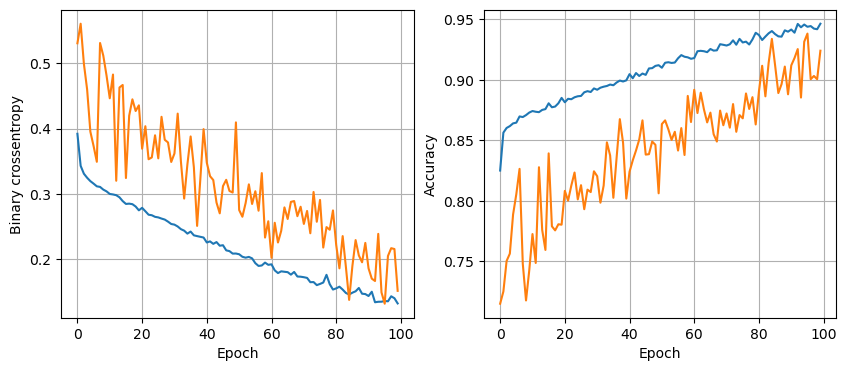

119/119 [==============================] - 0s 2ms/step - loss: 0.5890 - accuracy: 0.8423
64 nodes, dropout 0, lr0.005, batch size 128


119/119 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8557
64 nodes, dropout 0, lr0.001, batch size 32


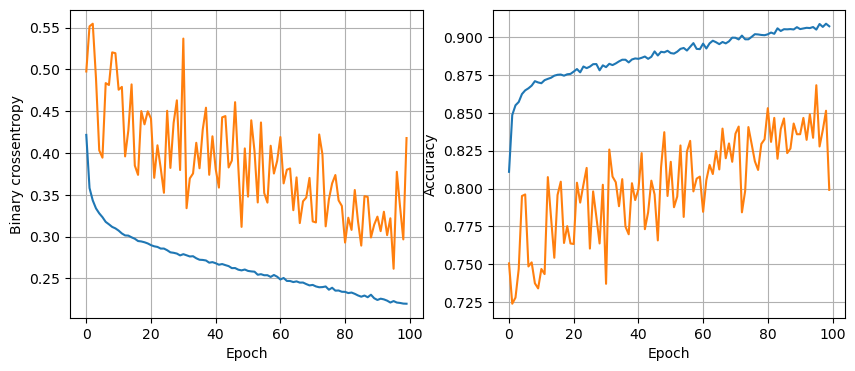

119/119 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8707
64 nodes, dropout 0, lr0.001, batch size 64


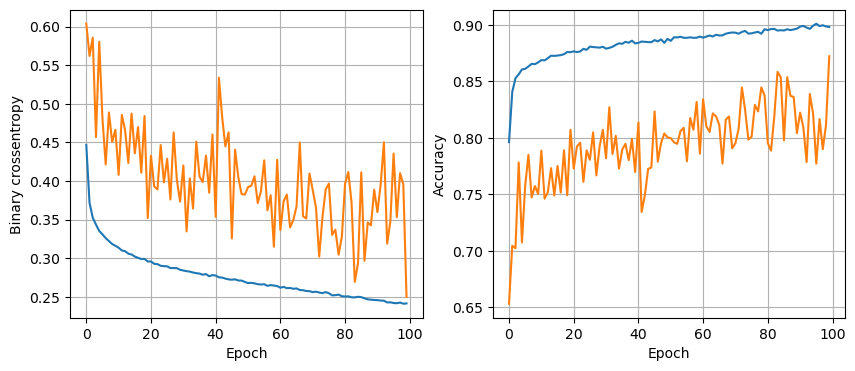

119/119 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8515
64 nodes, dropout 0, lr0.001, batch size 128


119/119 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.8733
64 nodes, dropout 0.2, lr0.01, batch size 32


119/119 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.8725
64 nodes, dropout 0.2, lr0.01, batch size 64


119/119 [==============================] - 0s 1ms/step - loss: 0.3106 - accuracy: 0.8701
64 nodes, dropout 0.2, lr0.01, batch size 128


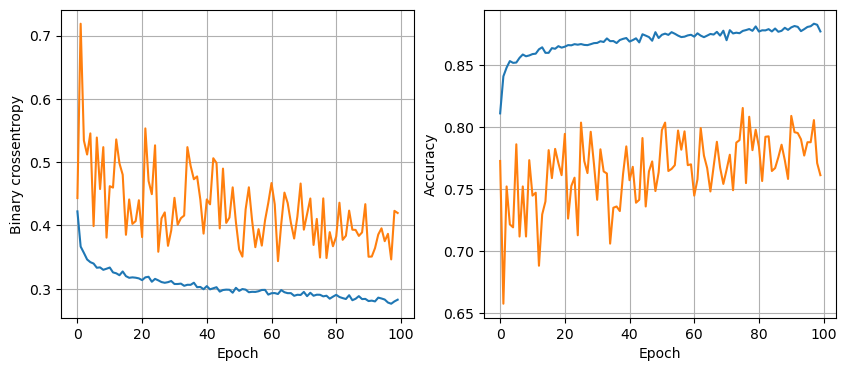

119/119 [==============================] - 0s 1ms/step - loss: 0.3003 - accuracy: 0.8709
64 nodes, dropout 0.2, lr0.005, batch size 32


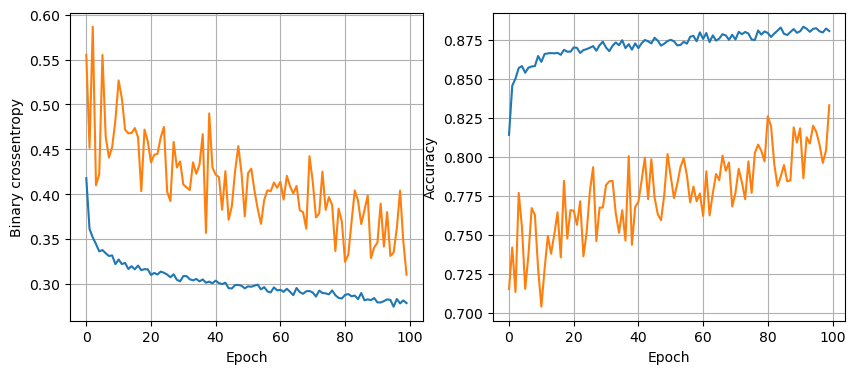

119/119 [==============================] - 0s 1ms/step - loss: 0.3047 - accuracy: 0.8728
64 nodes, dropout 0.2, lr0.005, batch size 64


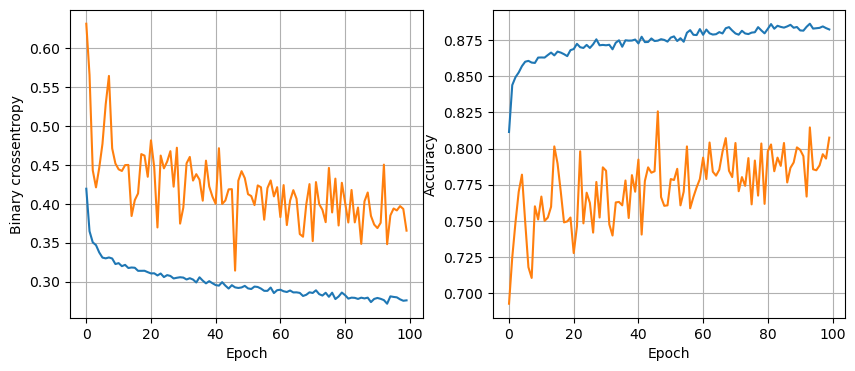

119/119 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.8743
64 nodes, dropout 0.2, lr0.005, batch size 128


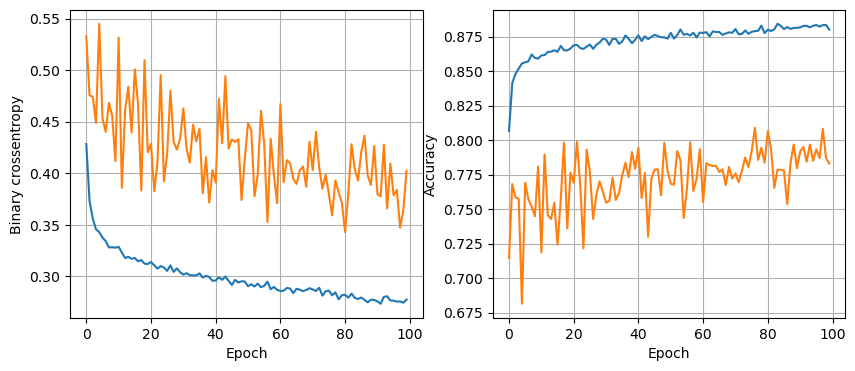

119/119 [==============================] - 0s 1ms/step - loss: 0.2995 - accuracy: 0.8728
64 nodes, dropout 0.2, lr0.001, batch size 32


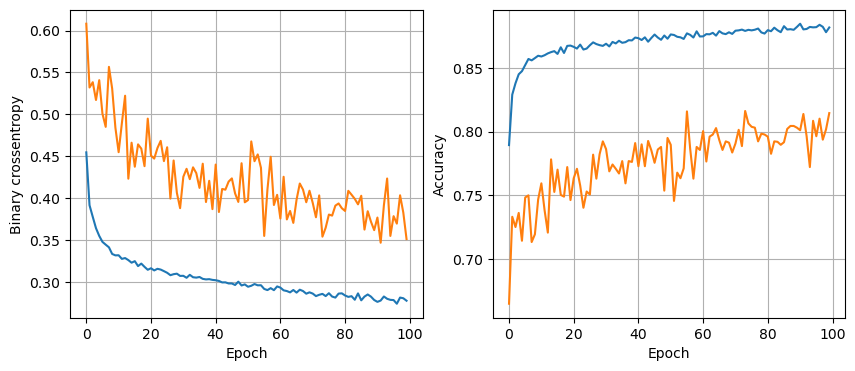

119/119 [==============================] - 0s 1ms/step - loss: 0.2934 - accuracy: 0.8746
64 nodes, dropout 0.2, lr0.001, batch size 64


119/119 [==============================] - 0s 1ms/step - loss: 0.2943 - accuracy: 0.8775
64 nodes, dropout 0.2, lr0.001, batch size 128


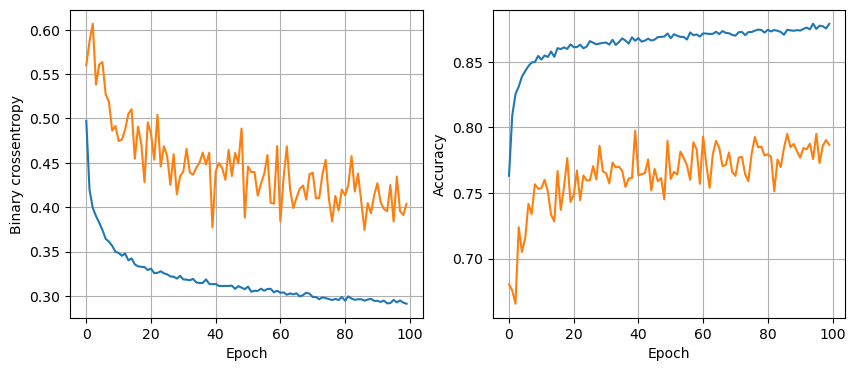

119/119 [==============================] - 0s 1ms/step - loss: 0.2928 - accuracy: 0.8725


In [41]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.01,0.005,0.001]:
            for batch_size in [32,64,128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr{lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid,y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [42]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)


119/119 [==============================] - 0s 1ms/step


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1362
           1       0.88      0.94      0.91      2442

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

